<img src="./images/eu_banner.png" alt="EU Banner" width="100%"/>

# **LISFLOOD Use Case - 3) Model Run**
---

This use case intends to introduce the basic mechanics of the hydrological model [LISFLOOD](https://github.com/ec-jrc/lisflood-code/).
<br>
In this exercise, the objective is to conduct a model run read and visualize multiple time series and maps to investigate the results. <br>

## **3) Main Run Settings**

Remember, that we had two different settings files in the **`/settings`** folder:
* **`Settings_PreRun.xml`**: the settings file prepared and used for the initialization run (last exercise)  
* **`Settings_Run.xml`**: the settings file prepared and used for the actual model or calibration run (this exercise)  

We managed the initialization already in which we created the steady state inflow rates to the lower zone, and now we will utilize this information to perform the actual model run.<br>
As introduced in the last exercise, the settings differ from the initialization run! 

---

The main settings of the main model run in our example look:

<small>

```xml
<lfoptions>
    # [...]
    
    # INITIALIZATION RUN
    <setoption choice="1" name="TransLoss"/>
    <setoption choice="1" name="MCTRouting"/>

    <setoption choice="0" name="InitLisflood"/>
    <setoption choice="1" name="ColdStart"/>

    #-----------------------------------------------------------
    # report time series
    #-----------------------------------------------------------
    # report discharge TS
    <setoption choice="1" name="repDischargeTs"/>
    <setoption choice="1" name="repEtactBudykoTs"/>

    # report gauges and sites
    <setoption choice="0" name="repStateSites"/>
    <setoption choice="0" name="repRateSites"/>
    <setoption choice="1" name="repStateUpsGauges"/>
    <setoption choice="1" name="repRateUpsGauges"/>
    <setoption choice="1" name="repMeteoUpsGauges"/>

    # report reservoirs and lakes
    <setoption choice="0" name="repsimulateLakes"/>
    <setoption choice="0" name="repsimulateReservoirs"/>

    # report et-related rates (do not show up via repRates)
    <setoption choice="1" name="repBal1"/>
    
    #-----------------------------------------------------------
    # report maps
    #-----------------------------------------------------------
    # report state maps
    <setoption choice="1" name="repStateMaps"/>

    # report end maps
    <setoption choice="0" name="repEndMaps"/>
    <setoption choice="0" name="repTopSoilMoistureMaps"/>
    <setoption choice="0" name="repSurfaceSoilMoistureMaps"/>
    <setoption choice="1" name="repDischargeMaps"/>
    <setoption choice="0" name="repSurfaceRunoffMaps"/>

    # report maps
    <setoption choice="0" name="repRainMaps"/>
    <setoption choice="1" name="repSnowMaps"/>
    <setoption choice="1" name="repSnowCoverMaps"/>
    <setoption choice="1" name="repSnowMeltMaps"/>

    <setoption choice="0" name="repThetaMaps"/>
    <setoption choice="0" name="repThetaForestMaps"/>
    <setoption choice="0" name="repThetaIrrigationMaps"/>
    <setoption choice="1" name="repLZMaps"/>
    <setoption choice="1" name="repUZMaps"/>
    <setoption choice="0" name="repGwPercUZLZMaps"/>
    <setoption choice="1" name="repE2O1"/>
    <setoption choice="0" name="repE2O2"/>
    <setoption choice="0" name="repRWS"/>

    # [...]

</lfoptions>

<lfuser>
    # [...]

    # GENERAL MODEL SETUP RUN
    <textvar name="PathRoot" value= "./../7859_testing">
    <textvar name="PathInit" value="$(PathRoot)/initial">
    <textvar name="CalendarDayStart" value="02/01/1975 00:00">
    <textvar name="StepStart" value="02/01/1975 00:00">
    <textvar name="StepEnd" value="01/01/2024 00:00">
    <textvar name="timestepInit" value="1"/>
    <textvar name="DtSec" value="86400"/>
    <textvar name="DtSecChannel" value="14400"/>
    <textvar name="Gauges" value="-72.675 -45.425">
    <textvar name="ReportSteps" value="365+365..endtime">

    # [...]

    # INITIAL CONDITIONS
    # water balance
    <textvar name="OFDirectInitValue" value="0">
    <textvar name="OFOtherInitValue" value="0">
    <textvar name="OFForestInitValue" value="0">
    <textvar name="SnowCoverAInitValue" value="0">
    <textvar name="SnowCoverBInitValue" value="0">
    <textvar name="SnowCoverCInitValue" value="0">
    <textvar name="FrostIndexInitValue" value="0">
    <textvar name="CumIntInitValue" value="0">
    <textvar name="UZInitValue" value="$(PathOut)/uz.end.nc">
    <textvar name="DSLRInitValue" value="1">

    # soil
    <textvar name="LZInitValue" value="-9999">
    <textvar name="ThetaInit1Value" value="$(PathOut)/th1.end.nc">
    <textvar name="ThetaInit2Value" value="$(PathOut)/th2.end.nc">
    <textvar name="ThetaInit3Value" value="$(PathOut)/th3.end.nc">

    # channel
    <textvar name="TotalCrossSectionAreaInitValue" value="-9999">
    <textvar name="CrossSection2AreaInitValue" value="-9999">
    <textvar name="PrevSideflowInitValue" value="-9999">
    <textvar name="PrevDischarge" value="-9999">
    <textvar name="PrevDischargeAvg" value="-9999">
    <textvar name="PrevCmMCTInitValue" value="-9999">
    <textvar name="PrevDmMCTInitValue" value="-9999">

    # lake (if simulateLakes = 1)
    <textvar name="LakeInitialLevelValue" value="-9999">
    <textvar name="LakePrevInflowValue" value="-9999">
    <textvar name="LakePrevOutflowValue" value="-9999">

    # forest
    <textvar name="CumIntForestInitValue" value="0">
    <textvar name="UZForestInitValue" value="$(PathOut)/uzf.end.nc">
    <textvar name="DSLRForestInitValue" value="1">
    <textvar name="ThetaForestInit1Value" value="$(PathOut)/thf1.end.nc">
    <textvar name="ThetaForestInit2Value" value="$(PathOut)/thf2.end.nc">
    <textvar name="ThetaForestInit3Value" value="$(PathOut)/thf3.end.nc">

    # irrigation
    <textvar name="CumIntIrrigationInitValue" value="0">
    <textvar name="UZIrrigationInitValue" value="0">
    <textvar name="DSLRIrrigationInitValue" value="1">
    <textvar name="ThetaIrrigationInit1Value" value="$(PathOut)/thi1.end.nc">
    <textvar name="ThetaIrrigationInit2Value" value="$(PathOut)/thi2.end.nc">
    <textvar name="ThetaIrrigationInit3Value" value="$(PathOut)/thi3.end.nc">

    # impervious (sealed) areas
    <textvar name="CumIntSealedInitValue" value="0">
    # [...]

    <textvar name="TransLossTS" value="$(PathOut)/TransLosslong_term_run.tss"></textvar>   
    <textvar name="TransLossQAvgTS" value="$(PathOut)/TransLossQAvglong_term_run.tss"></textvar>      

</lfuser>

<lfbinding>
    <textvar name="LZAvInflowMap" value="$(PathInit)/lzavin">
    <textvar name="SeepTopToSubBAverageOtherMap" value="$(PathOut)/SeepTopToSubBAverageOtherMap"> </textvar> 
    <textvar name="SeepTopToSubBAverageForestMap" value="$(PathOut)/SeepTopToSubBAverageForestMap"> </textvar>    
    <textvar name="SeepTopToSubBAverageIrrigationMap" value="$(PathOut)/SeepTopToSubBAverageIrrigationMap"> </textvar>             
</lfbinding>


```


Remember, in the pre-run (initialization) we should have produced 16 maps that are part of the settings here as well, as we need them to properly initialize the model states.<br>
In general, you probably notice some differences compared to the *Initialization Run*, which we will briefly discuss:
* The **`InitLisflood`** setting was now set to 0 as we obviously do not want to initialize LISFLOOD again.
* The **`ColdStart`** setting was turned off (put 0).
* We picked two flags that we recommend to use (set to 1) with respect to the considered processes:
    * **`MCTRouting`** to use MCT routing
    * **`TransLoss`** to use transmission losses
* The **report time series** and **report maps** blocks are crucial now since we define here what outputs we want to print. Users should be aware that especially the map block can lead to a **huge** increase in run times and thus, it is recommended to only print whatever variables are needed.
    * We printed a couple of maps and time series. For time series the **`...UpsGauges`** settings are improtant if you want to have (sub-)basin time series for the locations you specify under **`...Gauges`**. This provides aggregated time series for the (sub-)basins rather than pixel-specific time series.
* For the general model setup block under **`<lfuser>`** is almost similar to the setup in the initialization run, however, we included one special condition for **`ReportSteps`**, which provides a lot of flexibility to manage the printing of the state variables (**`repStateMaps`** ).
    * The **`365+365..endtime`** value means that we are writing only the snapshoot of the state variables every 365 days, so roughly at the end of each year. However, users can write much more time steps, e.g. **`1..99999`** indicates that every time steps will be written to the state variables .nc files. More infos on that setting can be found [here](https://ec-jrc.github.io/lisflood-code/3_step3_preparing-setting-file/)  
* The **inital conditions block** contains some changes compared to the initialization run. For example for all theta (soil moisture) variables we set the **`.end.nc`** files that were produced during the initialzation for each layer. The same applies to the Upper Zone (UZ) initialization that also take the values stored in the files produced during initialization. 
* In the bindings block, do not forget to define the paths to the average percolation and seepage maps produced in the initialization run.

More infos can be found [here](https://ec-jrc.github.io/lisflood-code/3_step6_running-LISFLOOD/).
As this is a crucial step and understanding the settings file is one of the keys for a succesfull LISFLOOD applicatons, we encourage users to take some time to play around here and do some testing.

If everything is set properly in your **`Settings_Run.xml`** file then we can start running the actual model run.
As before, open the terminal, navigate to your settings folder, activate your conda environment (which you should have done already in the initialization) where you installed LISFLOOD and run the model.
This should look as follows:

```bash
conda activate <your_lisflood_environment>
cd <path_where_you_saved_the_repository>/settings/
lisflood Settings_Run.xml
```

When the run was successfull, you should have a couple of maps (.nc) and time series files (.tss) files in your **`$(PathOut)`** folder as described before.<br>
We will now check how the steady-state percolation values in this file look!

In [257]:
# Universally applicable Lisflood TSS Read Function
def read_lisflood_tss_fwf(
    out_dir,
    varname,
    start_date,
    n_gauges,
    skiprows,
    freq="D"
):
    """
    Generic reader for LISFLOOD .tss files with varname+runname convention
    If file does not exist, returns NaN DataFrame instead of crashing.
    """
    run_name = out_dir.name
    tss_file = out_dir / f"{varname}{run_name}.tss"

    if not tss_file.exists():
        print(f"⚠️  Missing LISFLOOD file → filled with NaNs: {tss_file}")
        return pd.DataFrame(
            columns=[f"gauge_{i+1}" for i in range(n_gauges)]
        ) 

    df = pd.read_fwf(tss_file, skiprows=skiprows, header=None)
    df.columns = ["date"] + [f"gauge_{i+1}" for i in range(n_gauges)]
    df["date"] = pd.date_range(
        start=start_date,
        periods=len(df),
        freq=freq
    )
    return df.set_index("date")


# Universally applicable Lisflood TSS Read Function
def read_lisflood_tss(
    out_dir: Path,
    varname: str,
    start_date: str,
    n_gauges: int,
    skiprows: int,
    freq: str = "D"
) -> pd.DataFrame:
    """
    Robust reader for LISFLOOD .tss files with varname+runname convention.
    Handles small float values correctly.
    """
    run_name = out_dir.name
    tss_file = out_dir / f"{varname}{run_name}.tss"

    if not tss_file.exists():
        print(f"⚠️ Missing LISFLOOD file → filled with NaNs: {tss_file}")
        return pd.DataFrame(
            columns=[f"gauge_{i+1}" for i in range(n_gauges)]
        )

    # Read the file using whitespace delimiter for robustness
    df = pd.read_csv(
        tss_file,
        skiprows=skiprows,
        delim_whitespace=True,
        header=None,
        usecols=range(n_gauges + 1),  # only keep index + gauges
        dtype={i: float for i in range(1, n_gauges + 1)}  # gauge columns as float
    )

    # Only keep the first n_gauges + 1 columns (date/index + gauges)
    df = df.iloc[:, : n_gauges + 1]

    # Convert gauge columns to float safely
    for i in range(1, n_gauges + 1):
        df[i] = df[i].astype(float)

    # Set column names
    df.columns = ["date"] + [f"gauge_{i+1}" for i in range(n_gauges)]

    # Create date index
    df["date"] = pd.date_range(start=start_date, periods=len(df), freq=freq)
    return df.set_index("date")


---

## 3a) Time Series (*.tss*)

For the time series we first load some libraries, create a function that easily reads all desired time series of the variables of interest and can be adapted accordingly.<br>
We create a dict in which we can map the files that we would like to read to whatever variable names we want.<br>
Users of course do not need to follow this approach, which is just an internal approach to handle files and variables in a structured way.


In [ ]:
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [89]:
# Read the Upstream Area to get Basin Size
path_model = Path('..')
uparea_file = "upArea_unclipped.nc"
outlet_file = "outlet.txt"
uparea = xr.open_dataset(path_model / "maps" / uparea_file)
outlet = pd.read_csv(path_model / "station" / outlet_file,delimiter="\t", names=["lon", "lat", "id"])

basin_area = uparea.sel(lon=outlet.lon.item(), lat=outlet.lat.item(), method="nearest") # basin size in m2
basin_area = basin_area.Band1.item()

In [258]:
# Start Date
start_date = "01/01/1975 00:00"

# Read Data
outfold = Path("/home/schafti/Documents/01_Hydrology/01_Lisflood/00_SourceCode/01_Playground/01_Test_Usecase/create_submodel_7859/7859_testing/out/long_term_run/")
run_name = "long_term_run"
dis_file = outfold / f"dis{run_name}.tss"

with open(dis_file) as f:
    lines = f.readlines()

# Extract number of gauges
n_gauges = int(lines[1].strip()) - 1
skiprows = 3 + n_gauges

# Obs Q
# obs_dis = pd.read_csv(OBS_DIR / 'observations.csv',parse_dates=[0])
# obs_dis.columns = ["Date","Discharge"]
# obs_dis = obs_dis.set_index("Date") #.drop(columns="date")

# Read Sim (all Vars)
# ETA = ESActPixel+self.var.TaPixel+self.var.TaInterceptionAll+self.var.EvaAddM3*self.var.M3toMM
vars_to_read = {
    "q": "dis",
    "et0": "etUps",
    "ew0": "ewUps", # open water ref ET
    "ewact":"evaopen", # open water ref ET2? -> probably actual
    "eta": "actEvapo",
    "et_budy": "actETPBUDYKOUps",
    "es": "esActUps",
    "transp": "tActUps",
    "intcpt": "ewIntActUps",
    "precip":"precipUps",
    "rain": "rainUps",
    "snow": "snowUps",
    "smlt": "snowMeltUps",
    "total_runoff": "totalRunoffUps",
    "perc": "percUZLZUps",
    "infil": "infUps",
    "qb_up": "qUzUps",
    "qb_low": "qLzUps",
    "gwloss": "gwLossUps",
    "lz": "lzUps",
    "uz": "uzUps",
    "theta": "theta1total",
    "theta2": "theta2total",
    "theta3": "theta3total"
}

lf_tss = {}

# Actual Read of files
for key, var in vars_to_read.items():
    lf_tss[key] = read_lisflood_tss(
        outfold, var, start_date, n_gauges, skiprows
    )

# Print the Variables
lf_tss.keys()

dict_keys(['q', 'et0', 'ew0', 'ewact', 'eta', 'et_budy', 'es', 'transp', 'intcpt', 'precip', 'rain', 'snow', 'smlt', 'total_runoff', 'perc', 'infil', 'qb_up', 'qb_low', 'gwloss', 'lz', 'uz', 'theta', 'theta2', 'theta3'])


---
### **Soil Moisture, Upper & Lower Zone Storages**
We will now have a short look at soil moisture as well as the upper and lower zone storages, e.g. to make sure that we do not have trends in the time series and to prove that the initialization worked properly.<br>
Forthis we only look at the first 10 years to see whether we can see something in the soild and groundwater that might point to any initialization error. <br>
We encourage users to also have a look at the full time series to make further hydrological investigations!

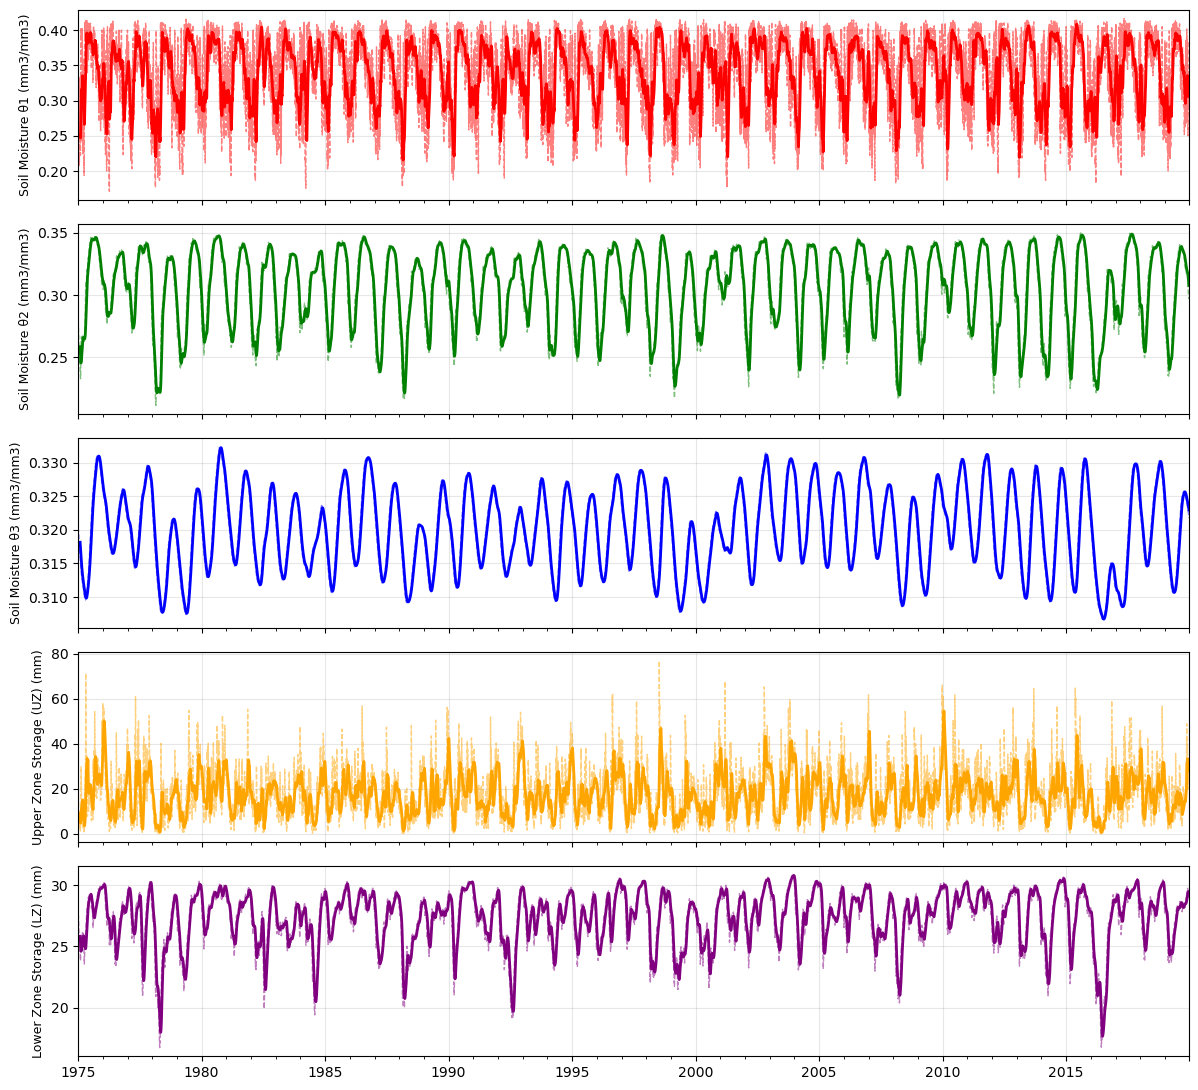

In [ ]:
# Number of days to zoom in (5 years)
xul = 365*5 # use the numebr of years/time steps that shopuld be printed

# Variables to plot and their labels
vars_to_plot = ["theta", "theta2", "theta3","uz", "lz"]
labels = [
          "Soil Moisture θ1 (mm3/mm3)", 
          "Soil Moisture θ2 (mm3/mm3)", 
          "Soil Moisture θ3 (mm3/mm3)",
          "Upper Zone Storage (UZ) (mm)", 
          "Lower Zone Storage (LZ) (mm)"]

colors = ["r", "g", "b", "orange", "purple"]

# Create subplots
fig, axes = plt.subplots(len(vars_to_plot), 1, figsize=(12, 11), sharex=True)

for i, var in enumerate(vars_to_plot):
    # Plot raw data with faint alpha
    lf_tss[var].plot(ax=axes[i], color=colors[i], lw=1, alpha=0.5, ls="--", label="_nolegend_")
    
    # Optionally, plot a rolling mean (e.g., 30-day moving average) for smoothing
    lf_tss[var].rolling(30).mean().plot(ax=axes[i], color=colors[i], lw=2, label=f"{labels[i]} 30-day MA")
    
    axes[i].set_ylabel(labels[i],fontsize=9)
    axes[i].grid(True, alpha=0.3)
    # Zoom to first 5 years if desired
    axes[i].set_xlim(lf_tss[var].index[0], lf_tss[var].index[xul])
    axes[i].legend().remove() 

# Shared x-label for all subplots
axes[-1].set_xlabel("")

# Adjust layout
fig.tight_layout()



---
### **Actual Evapotranspiration**
Now let us check how Actual Evapotranspiration (ETA) looks in the catchment.<br>
For this we will have a look at the annual ETA sums to explore what happened during the simulation period. <br>

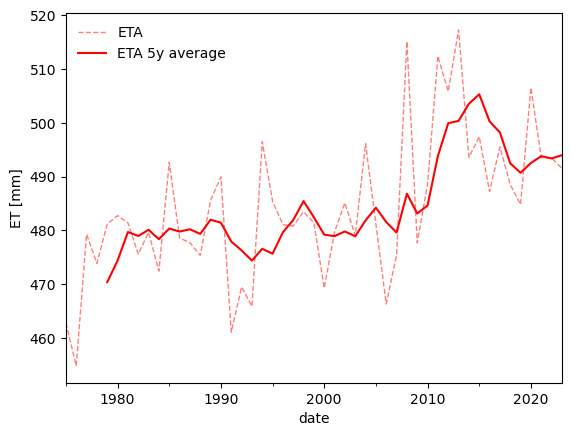

In [173]:
# Annual ETA
ws = 5 # moving average size in years
fig, ax = plt.subplots()
lf_tss["eta"].resample("YS").sum().plot(ax=ax,label="ETA",c="r",lw=1,alpha=0.5,ls="--")
lf_tss["eta"].resample("YS").sum().rolling(window=ws).mean().plot(ax=ax,label="ETA",c="r",lw=1.5)
ax.set_ylabel("ET [mm]")
plt.legend(["ETA", "ETA 5y average"],frameon=False);


According to our longterm LISFLOOD simulation there seems to be a rise in ETA after 2010, which we will further explore. <br>
We will check whether energy-based changes, reflected as ETP, or an increase in atmospheric water availability, reflected as precipitation, or a combination and less distinct cause is responsible for the signal. <br> 
Let us thus have a look at the corresponding annual anomalies with respect to a defined reference period that we set to 1980 to 2009.

Remember that precipitation had a significantly higher mgnitude than ETP, which is why we will use standardized anomalies.<br>
Besides, as we have seen already that the catchment is energy-limnited, the hydrologists will already have a clear tendency on the driver. 

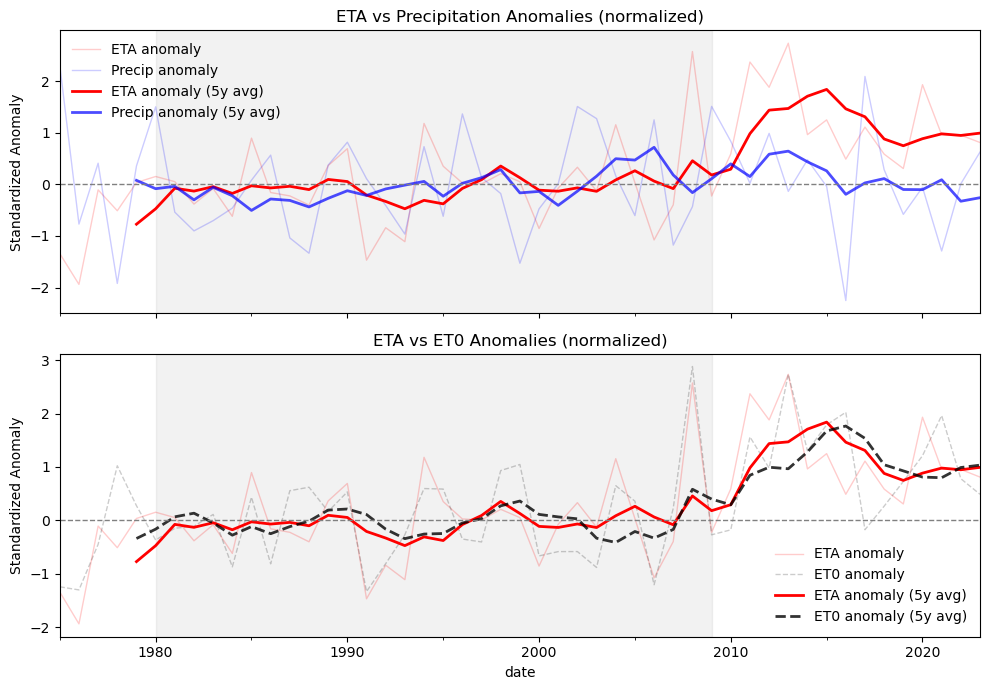

In [188]:
# --- Settings ---
ref_start, ref_end = "1980", "2009"
ws = 5  # moving average window in years

# --- Annual sums ---
eta_ann = lf_tss["eta"].resample("YS").sum()
precip_ann = lf_tss["precip"].resample("YS").sum()
et0_ann = lf_tss["et0"].resample("YS").sum()

# --- Compute reference means ---
eta_ref = eta_ann.loc[ref_start:ref_end].mean()
precip_ref = precip_ann.loc[ref_start:ref_end].mean()
et0_ref = et0_ann.loc[ref_start:ref_end].mean()

# --- Compute anomalies ---
eta_anom = eta_ann - eta_ref
precip_anom = precip_ann - precip_ref
et0_anom = et0_ann - et0_ref

# --- Normalize anomalies ---
eta_anom_std = eta_anom / eta_anom.std()
precip_anom_std = precip_anom / precip_anom.std()
et0_anom_std = et0_anom / et0_anom.std()

# --- Smooth anomalies with moving average ---
eta_smooth = eta_anom_std.rolling(ws).mean()
precip_smooth = precip_anom_std.rolling(ws).mean()
et0_smooth = et0_anom_std.rolling(ws).mean()

# --- Plot ---
fig, axes = plt.subplots(2, 1, figsize=(10,7), sharex=True)

# Top subplot: ETA vs Precip
# Raw anomalies (faint)
eta_anom_std.plot(ax=axes[0], color="r", lw=1, alpha=0.2, label=None)
precip_anom_std.plot(ax=axes[0], color="b", lw=1, alpha=0.2, label=None)

# Smoothed anomalies
eta_smooth.plot(ax=axes[0], label="ETA anomaly (5y avg)", color="r", lw=2)
precip_smooth.plot(ax=axes[0], label="Precip anomaly (5y avg)", color="b", lw=2, alpha=0.7)

axes[0].axhline(0, color="grey", ls="--", lw=1)
axes[0].set_ylabel("Standardized Anomaly")
axes[0].set_title("ETA vs Precipitation Anomalies (normalized)")
axes[0].legend(["ETA anomaly","Precip anomaly","ETA anomaly (5y avg)","Precip anomaly (5y avg)"],frameon=False)

# Highlight reference period
axes[0].axvspan(ref_start, ref_end, color='grey', alpha=0.1)

# Bottom subplot: ETA vs ET0
# Raw anomalies (faint)
eta_anom_std.plot(ax=axes[1], color="r", lw=1, alpha=0.2, label=None)
et0_anom_std.plot(ax=axes[1], color="k", lw=1, alpha=0.2, ls="--", label=None)

# Smoothed anomalies
eta_smooth.plot(ax=axes[1], label="ETA anomaly (5y avg)", color="r", lw=2)
et0_smooth.plot(ax=axes[1], label="ET0 anomaly (5y avg)", color="k", lw=2, ls="--", alpha=0.8)

axes[1].axhline(0, color="grey", ls="--", lw=1)
axes[1].set_ylabel("Standardized Anomaly")
axes[1].set_title("ETA vs ET0 Anomalies (normalized)")
axes[1].legend(["ETA anomaly","ET0 anomaly","ETA anomaly (5y avg)","ET0 anomaly (5y avg)"],frameon=False)

# Highlight reference period
axes[1].axvspan(ref_start, ref_end, color='grey', alpha=0.1)

# Layout adjustments
fig.tight_layout()
plt.show()


Annual water balance ratios (mean ± std):
  Runoff coefficient Q/P   = 0.73 ± 0.04
  Evapotranspiration ETA/P = 0.25 ± 0.03
  ET efficiency ETA/ET0    = 0.70 ± 0.02
Mean water balance closure (Q/P + ETA/P) = 0.98
Water balance closure at the end of the simulation = 0.98


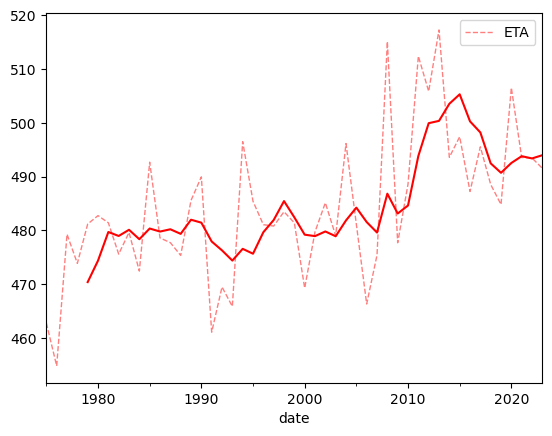

In [ ]:
# Check ET/P & Q/P (Runoff Coefficient) & WB Closure
# Annual means
q_mm = lf_tss["q"]*1000*3600*24/basin_area

q_p   = q_mm.resample("YS").sum() / lf_tss["precip"].resample("YS").sum()
eta_p = lf_tss["eta"].resample("YS").sum() / lf_tss["precip"].resample("YS").sum()
eta_et0 = lf_tss["eta"].resample("YS").sum() / lf_tss["et0"].resample("YS").sum()
wb_closure = q_p + eta_p
wb_closure_end = (q_mm.resample("YS").sum().cumsum().iloc[-1] + lf_tss["eta"].resample("YS").sum().cumsum().iloc[-1]) / lf_tss["precip"].resample("YS").sum().cumsum().iloc[-1]

print("Annual water balance ratios (mean ± std):")
print(f"  Runoff coefficient Q/P   = {q_p.mean().item():.2f} ± {q_p.std().item():.2f}")
print(f"  Evapotranspiration ETA/P = {eta_p.mean().item():.2f} ± {eta_p.std().item():.2f}")
print(f"  ET efficiency ETA/ET0    = {eta_et0.mean().item():.2f} ± {eta_et0.std().item():.2f}")

# Check WB closure
print(f"Mean water balance closure (Q/P + ETA/P) = {wb_closure.mean().item():.2f}")
print(f"Water balance closure at the end of the simulation = {wb_closure_end.item():.2f}")


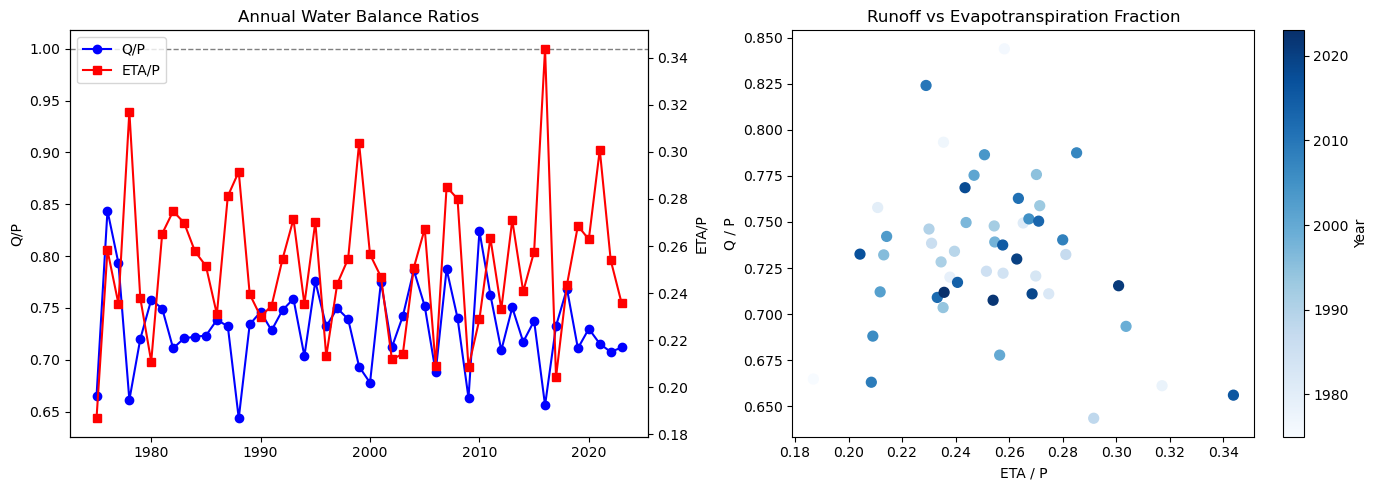

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# ----------------------------
# Left: Annual water balance ratios over time
# ----------------------------

# Primary axis: Q/P
axes[0].plot(q_p.index, q_p.values, color="b", marker="o", label="Q/P", lw=1.5)
axes[0].set_ylabel("Q/P")
axes[0].set_title("Annual Water Balance Ratios")
axes[0].axhline(1, color="grey", ls="--", lw=1)

# Secondary axis: ETA/P (optional, use if scales differ)
ax2 = axes[0].twinx()
ax2.plot(eta_p.index, eta_p.values, color="r", marker="s", label="ETA/P", lw=1.5)
ax2.set_ylabel("ETA/P")

# Combine legends
lines1, labels1 = axes[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[0].legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# ----------------------------
# Right: Scatter Q/P vs ETA/P
# ----------------------------
sc = axes[1].scatter(eta_p, q_p, c=eta_p.index.year, cmap="Blues", s=50)
axes[1].set_xlabel("ETA / P")
axes[1].set_ylabel("Q / P")
axes[1].set_title("Runoff vs Evapotranspiration Fraction")

# Add colorbar for year
cbar = fig.colorbar(sc, ax=axes[1])
cbar.set_label("Year")

# ----------------------------
# Layout adjustments
# ----------------------------
fig.tight_layout()


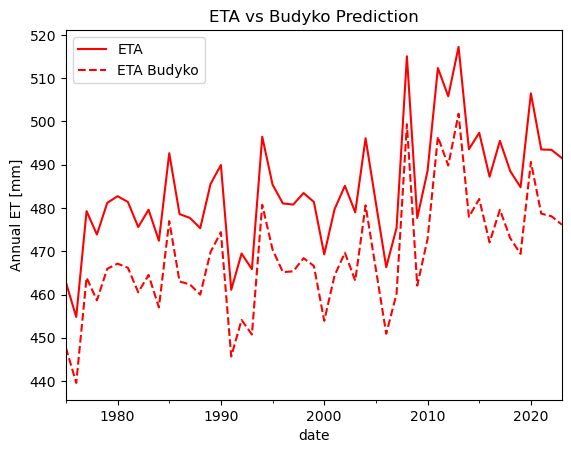

In [111]:
# Budyko Prediction
fig, ax = plt.subplots()
lf_tss["eta"].resample("YS").sum().plot(ax=ax, label="ETA",c="r")
lf_tss["et_budy"].resample("YS").sum().plot(ax=ax, label="ET Budyko", c="r", ls="--")
ax.set_ylabel("Annual ET [mm]")
ax.set_title("ETA vs Budyko Prediction")
ax.legend(["ETA","ETA Budyko"])